<a href="https://colab.research.google.com/github/csubham2370/Major-Project-on-Crop-Recommendation-System/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By combining these imports, you're setting up your Python environment for data analysis, visualization, and machine learning tasks while also configuring it to handle warnings in a specific way.

In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Upload a file on Google Colab
This code allows the user to upload a file from their local system to a Google Colab notebook environment, and the uploaded file(s) information is stored in the uploaded variable for further processing within the notebook.

In [2]:
from google.colab import files

# Upload a file
uploaded = files.upload()

Saving modified_crop.csv to modified_crop.csv


# Importing the Data
This code reads the contents of a CSV file named 'modified_crop.csv' using Pandas and stores it in a DataFrame named crop for further processing and analysis in Python.


In [3]:
crop = pd.read_csv('modified_crop.csv')
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2245,7.0,144.0,195.0,22.963885,93.580660,5.856481,104.647299,apple
2246,11.0,27.0,30.0,27.696378,48.562249,6.394743,89.856465,mango
2247,0.0,123.0,205.0,22.027754,92.961295,5.790993,121.134918,apple
2248,111.0,87.0,48.0,26.398551,81.360289,5.571401,98.167520,banana


# crop.shape
This code is use for quickly check the size of your DataFrame, which is especially useful when dealing with large datasets or when you need to understand the structure of the data you're working with.

For example, if you run crop.shape and it returns (100, 5), it means that the DataFrame crop has 100 rows and 5 columns. and the number of elements is 500.

In [4]:
crop.shape

(2250, 8)

# crop.info()
By using crop.info(), you can quickly get an overview of the DataFrame, including its size, data types, and missing values, which is useful for initial data exploration and understanding the dataset's characteristics.

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2241 non-null   float64
 1   P            2243 non-null   float64
 2   K            2246 non-null   float64
 3   temperature  2246 non-null   float64
 4   humidity     2240 non-null   float64
 5   ph           2246 non-null   float64
 6   rainfall     2246 non-null   float64
 7   label        2242 non-null   object 
dtypes: float64(7), object(1)
memory usage: 140.8+ KB


# crop.head()
The purpose of using head() is to quickly inspect the structure and content of the DataFrame. It's often used as an initial step in data analysis to get a sense of what the data looks like before performing further operations. By examining the first few rows, you can check the column names, data types, and example values in the DataFrame.

In [6]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


# tail()
The purpose of using tail() is to quickly inspect the end of the DataFrame. It's often used to check for patterns or trends in the data, especially if the data is ordered chronologically or by some other criteria. By examining the last few rows, you can see the most recent data entries and verify that the DataFrame has been properly loaded or processed.

In [7]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2245,7.0,144.0,195.0,22.963885,93.580660,5.856481,104.647299,apple
2246,11.0,27.0,30.0,27.696378,48.562249,6.394743,89.856465,mango
2247,0.0,123.0,205.0,22.027754,92.961295,5.790993,121.134918,apple
2248,111.0,87.0,48.0,26.398551,81.360289,5.571401,98.167520,banana
2249,27.0,30.0,5.0,32.717485,90.546083,7.656978,113.328978,orange


# crop.isnull().sum()
crop.isnull().sum() gives you a Series where each entry represents the number of missing values in the corresponding column of the crop DataFrame. This information is useful for identifying and handling missing data in your dataset.

In [8]:
crop.isnull().sum()

N               9
P               7
K               4
temperature     4
humidity       10
ph              4
rainfall        4
label           8
dtype: int64

# crop.isnull().sum().sum()
crop.isnull().sum().sum() gives you the total number of missing values in the entire DataFrame crop, summing up the counts of missing values across all columns. This information is valuable for understanding the extent of missing data in your dataset

In [9]:
crop.isnull().sum().sum()

50

# crop.duplicated().sum()
crop.duplicated().sum() gives you the total number of duplicated rows in the DataFrame crop. This information is useful for identifying and handling duplicate entries in your dataset.

In [10]:
crop.duplicated().sum()

50

# interpolation
this code snippet ensures that missing values in the DataFrame crop are handled by interpolating them (linear interpolation) and by replacing missing values in the 'label' column with the most frequent label value. The resulting DataFrame crop1 has missing values appropriately handled.

In [11]:
crop1 = crop.interpolate()
most_frequent_label = crop1['label'].mode()[0]
crop1['label'].fillna(most_frequent_label, inplace=True)

# Here we recheck if any null value is present or not.

In [12]:
crop1.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# crop2 = crop1.drop_duplicates()
the DataFrame crop2 contains the data from crop1 with duplicate rows removed. This operation ensures that each row in crop2 is unique, based on all columns by default.

In [60]:
crop2 = crop1.drop_duplicates()
# crop2 = crop1

# Here we recheck if any duplicate rows are present or not.

In [61]:
 crop2.duplicated().sum()

0

# crop2.isnull().any()
returns a Series where each entry represents whether there are any missing values in the corresponding column of the DataFrame crop2. If the entry is True, it means that the column contains at least one missing value; otherwise, it's False.

In [18]:
crop2.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

# crop2.describe()
The output of crop2.describe() will be a DataFrame where each row represents a summary statistic, and each column represents a numerical column in the original DataFrame crop2. This summary statistics can provide insights into the distribution and spread of values in the dataset, helping with data exploration and analysis.

In [19]:
crop2.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000
mean,50.634667,53.484667,48.305556,25.645050,71.472892,6.466727,103.298559
std,37.005634,33.056752,50.784585,5.080798,22.245493,0.774784,54.889792
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.779258,60.210673,5.968265,64.468457
50%,37.000000,51.000000,32.000000,25.623092,80.458463,6.423558,94.695862
75%,85.000000,68.000000,49.000000,28.569403,89.972292,6.923130,123.595859
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# corr()
The corr() method is commonly used to identify relationships between variables in a dataset. High positive or negative correlation coefficients can indicate strong relationships between variables, while a correlation coefficient close to 0 suggests little to no relationship. These correlation coefficients can be further analyzed and interpreted to gain insights into the dataset.

In [20]:
corr = crop2.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.232731,-0.142168,0.031025,0.193970,0.098483,0.058066
P,-0.232731,1.000000,0.737782,-0.130993,-0.113701,-0.139056,-0.062638
K,-0.142168,0.737782,1.000000,-0.167578,0.192811,-0.169344,-0.053404
temperature,0.031025,-0.130993,-0.167578,1.000000,0.207334,-0.015934,-0.022018
humidity,0.193970,-0.113701,0.192811,0.207334,1.000000,-0.008113,0.096734
ph,0.098483,-0.139056,-0.169344,-0.015934,-0.008113,1.000000,-0.102838
rainfall,0.058066,-0.062638,-0.053404,-0.022018,0.096734,-0.102838,1.000000


#size
The .size method in Python is used to get the number of elements in an object, such as a list, tuple, set, or dictionary. However, it seems you've added parentheses to the method, which is not correct for this purpose.

In [21]:
 crop2.size

18000

#columns
The .columns attribute is used to retrieve the column labels of a DataFrame in pandas.

In [22]:
 crop2.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

#  crop2['label'].unique()
The code crop2['label'].unique() is used to get the unique values in the 'label' column of the DataFrame crop2.


In [23]:
crop2['label'].unique()

array(['rice', 'maize', 'papaya', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

#dtypes
The dtypes attribute in pandas DataFrame is used to get the data types of each column in the DataFrame.

In [24]:
 crop2.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

# crop2['label'].value_counts()

* The output of crop2['label'].value_counts() will be a Series where each unique label in the 'label' column of crop2 is listed along with the count of occurrences of that label in the dataset. This information is useful for understanding the distribution of different labels in the dataset and can be valuable for various analytical purposes.

In [25]:
crop2['label'].value_counts()

papaya         114
mothbeans      105
banana         104
mango          104
grapes         104
watermelon     103
cotton         102
coffee         102
kidneybeans    102
chickpea       102
blackgram      101
lentil         101
pomegranate    101
apple          101
orange         101
coconut        101
jute           101
rice           101
maize          100
mungbean       100
pigeonpeas     100
muskmelon      100
Name: label, dtype: int64

#Visualizing the correlation matrix
 By visualizing the correlation matrix as a heatmap, you can easily identify patterns and relationships between variables in the dataset. Positive correlations will appear in warm colors, negative correlations in cool colors, and no correlation in neutral colors. The annotations provide the exact correlation coefficients, making it easier to interpret the heatmap.

<Axes: >

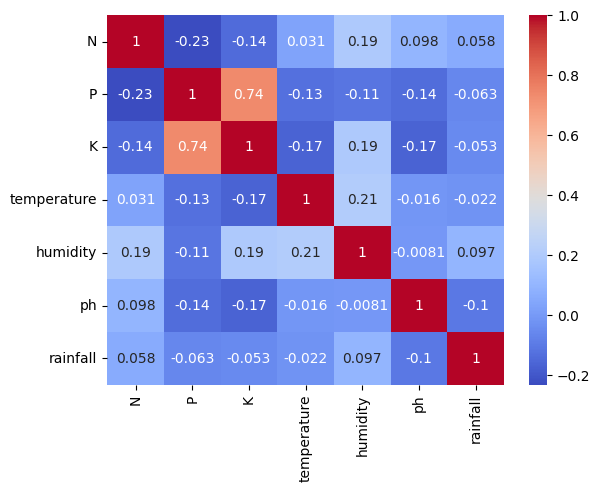

In [26]:
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

#Distribution of values in the 'N' column of the DataFrame crop2.

By executing this code, you'll generate a distribution plot showing the distribution of values in the 'N' column of the DataFrame crop2. This visualization helps in understanding the distribution of values and identifying any patterns or outliers present in the data.

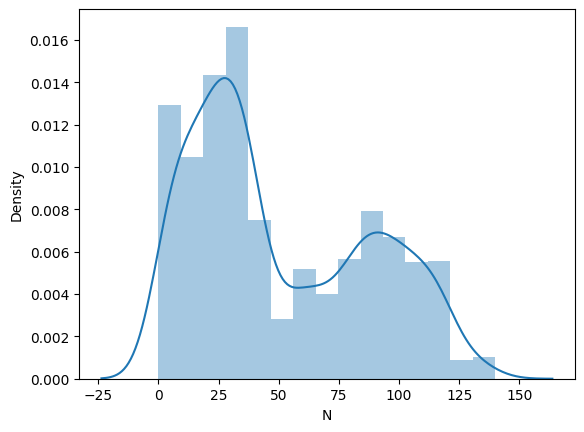

In [27]:
sns.distplot(crop2['N'])
plt.show()

#Distribution of values in the 'P' column of the DataFrame crop2.

By executing this code, you'll generate a distribution plot showing the distribution of values in the 'P' column of the DataFrame crop2. This visualization helps in understanding the distribution of values and identifying any patterns or outliers present in the data.

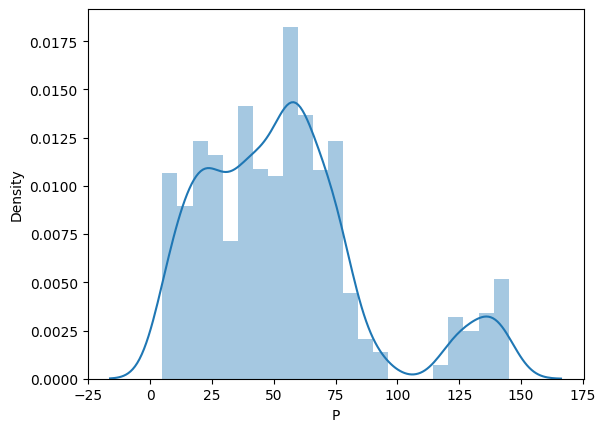

In [28]:
sns.distplot(crop2['P'])
plt.show()

#Distribution plot of K, Temperature, Humidity, ph, Rainfall using Seaborn's distplot() function.

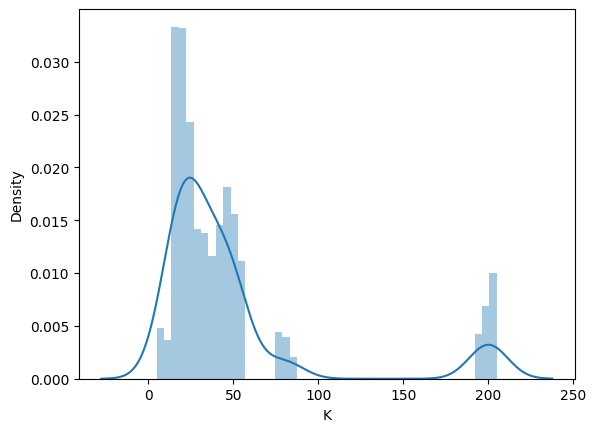

In [29]:
sns.distplot(crop2['K'])
plt.show()

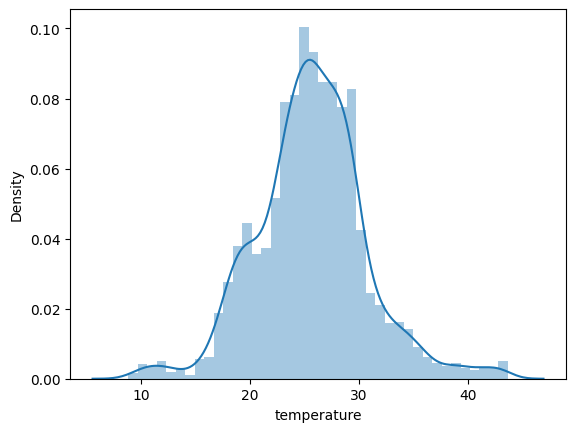

In [30]:
sns.distplot(crop2['temperature'])
plt.show()

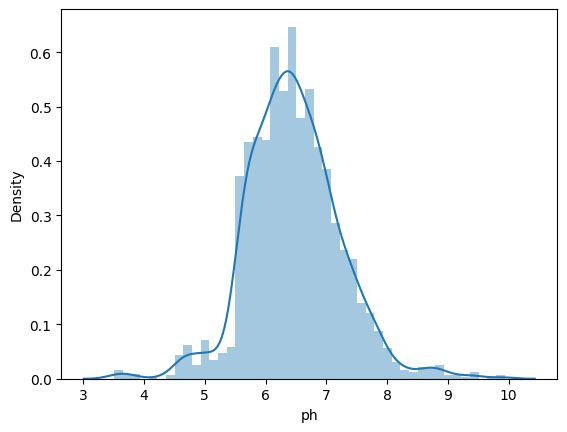

In [31]:
sns.distplot(crop2['ph'])
plt.show()

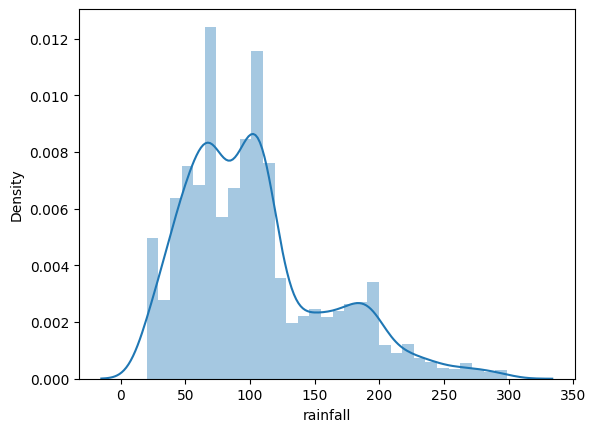

In [32]:
sns.distplot(crop2['rainfall'])
plt.show()

# Seperating features and target label
 this code prepares your data by selecting relevant features and the target variable for use in a machine learning model. The features are the input variables used to make predictions, while the target variable is the output variable you want to predict.

In [33]:
features =  crop2[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target =  crop2['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels =  crop2['label']

# Initialzing empty lists to append all model's name and corresponding name
By initializing these lists, you're setting up a structure to collect and organize the results of model evaluation, likely for comparison or further analysis. As you evaluate different models, you can append their accuracy scores to the acc list and their names to the model list, allowing you to track and analyze the performance of each model.


In [34]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

### The line **from sklearn.model_selection import train_test_split** imports the train_test_split function from the sklearn.model_selection module. This function is commonly used in machine learning to split datasets into training and testing sets.

In [35]:
from sklearn.model_selection import train_test_split

### The line **Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)** uses the train_test_split function from scikit-learn to split the dataset into training and testing sets.

In [36]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Now we will train our model

In machine learning (ML), model training involves the process of feeding data into a machine learning algorithm or model to enable it to learn patterns, relationships, and insights from the data.

##Decision Tree
Decision tree training involves recursively partitioning the input space (feature space) into smaller regions while aiming to minimize impurity or maximize information gain at each step.

In [37]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  0.9088888888888889
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        19
   blackgram       0.69      0.90      0.78        20
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        26
      grapes       1.00      1.00      1.00        23
        jute       0.77      0.96      0.86        25
 kidneybeans       0.00      0.00      0.00        19
      lentil       1.00      1.00      1.00        17
       maize       0.86      0.95      0.90        19
       mango       1.00      1.00      1.00        22
   mothbeans       1.00      0.63      0.77        19
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
      orange       0.88      1.0

# from sklearn.model_selection import cross_val_score

This line of code imports the cross_val_score function from the model_selection module of scikit-learn.cross_val_score is used for cross-validation

In [38]:
from sklearn.model_selection import cross_val_score


# Cross validation score (Decision Tree)
After executing this line of code, score will contain an array of cross-validated scores, allowing you to assess the performance of your decision tree model across multiple train-test splits of the data. These scores can then be used to estimate the model's generalization ability and variability.

In [39]:
score = cross_val_score(DecisionTree, features, target,cv=5)

#score
The variable score contains the cross-validated scores obtained from the cross_val_score function. These scores represent the performance of the decision tree model (DecisionTree) across different folds of the cross-validation process

In [40]:
score

array([0.91777778, 0.90888889, 0.88444444, 0.90888889, 0.93333333])

### Saving trained Decision Tree model
To save a trained Decision Tree classifier using the pickle module in Python.

In [42]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '/content/models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes
Gaussian Naive Bayes (GNB) is a variant of the Naive Bayes algorithm that assumes the features are continuous and follows a Gaussian (normal) distribution.

In [43]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9822222222222222
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        19
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        22
      cotton       0.96      1.00      0.98        26
      grapes       1.00      1.00      1.00        23
        jute       0.86      0.96      0.91        25
 kidneybeans       1.00      1.00      1.00        19
      lentil       0.94      1.00      0.97        17
       maize       0.95      0.95      0.95        19
       mango       1.00      1.00      1.00        22
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00 

# Cross validation score (NaiveBayes)

In [44]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.98      , 0.99555556, 0.99555556, 0.99333333, 0.99333333])

### Saving trained Guassian Naive Bayes model

In [45]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '/content/models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

In [46]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9822222222222222
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        19
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        26
      grapes       1.00      1.00      1.00        23
        jute       0.85      0.88      0.86        25
 kidneybeans       1.00      1.00      1.00        19
      lentil       1.00      1.00      1.00        17
       maize       0.95      1.00      0.97        19
       mango       1.00      1.00      1.00        22
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.0

# Cross validation score (SVM)

In [47]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.96222222, 0.97777778, 0.98888889, 0.98666667, 0.98222222])

#Saving trained SVM model

In [48]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '/content/models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression
Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1.

For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 it belongs to Class 0. It’s referred to as regression because it is the extension of linear regression but is mainly used for classification problems.

In [49]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9533333333333334
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        19
   blackgram       0.94      0.85      0.89        20
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      0.94      0.97        18
      coffee       1.00      0.95      0.98        22
      cotton       0.93      0.96      0.94        26
      grapes       1.00      1.00      1.00        23
        jute       0.85      0.88      0.86        25
 kidneybeans       1.00      1.00      1.00        19
      lentil       0.77      1.00      0.87        17
       maize       0.89      0.89      0.89        19
       mango       1.00      1.00      1.00        22
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.95      0.98        21
   muskmelon       1.00      1.00      1.00        22
      orange       1.00   

# Cross validation score (Logistic Regression)

In [50]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.93111111, 0.95777778, 0.96444444, 0.96222222, 0.93555556])

### Saving trained Logistic Regression model

In [51]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '/content/models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [52]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9866666666666667
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        19
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        26
      grapes       1.00      1.00      1.00        23
        jute       0.86      0.96      0.91        25
 kidneybeans       1.00      1.00      1.00        19
      lentil       1.00      1.00      1.00        17
       maize       0.95      1.00      0.97        19
       mango       1.00      1.00      1.00        22
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00

# Cross validation score (Random Forest)

In [53]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.97777778, 0.99555556, 0.99777778, 0.99555556, 0.99111111])

### Saving trained Random Forest model

In [54]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '/content/models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

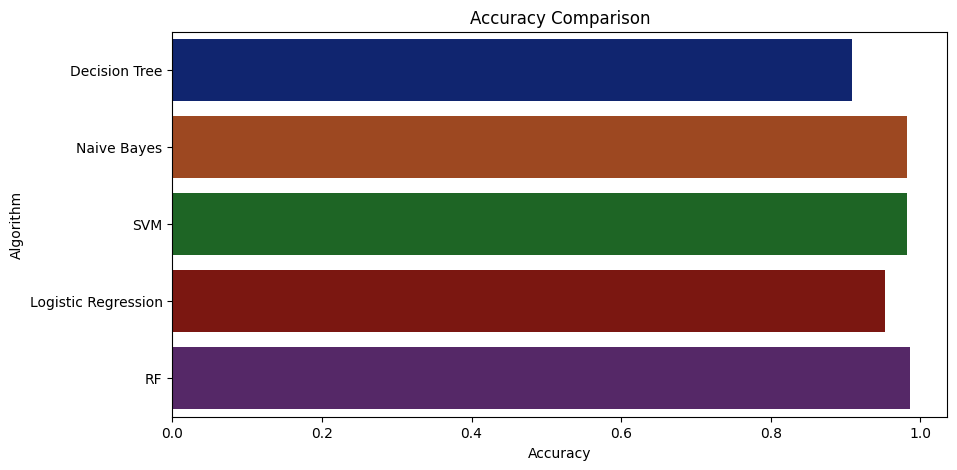

In [55]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [56]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9088888888888889
Naive Bayes --> 0.9822222222222222
SVM --> 0.9822222222222222
Logistic Regression --> 0.9533333333333334
RF --> 0.9866666666666667


## Making a prediction

In [57]:
data = np.array([[101,87,54,29,76,6.3,100]])
prediction = RF.predict(data)[0]
print("{} is a best crop to be cultivated. ".format(prediction))

banana is a best crop to be cultivated. 


In [58]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = RF.predict(features)[0]

    return prediction

In [59]:
N = 2
P = 123
k = 198
temperature = 39.64
humidity = 82.21
ph = 6.25
rainfall = 70.39
predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)
print("{} is a best crop to be cultivated. ".format(predict))

grapes is a best crop to be cultivated. 
